In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
feature = 'mean radius'
x_single = df[[feature]].values
y = df['target'].values

In [ ]:
standard_single = StandardScaler()
x_single_scaled = standard_single.fit_transform(x_single)

In [ ]:
model_single = LogisticRegression()
model_single.fit(x_single_scaled, y)

LogisticRegression()

In [ ]:
x_vals = np.linspace(x_single_scaled.min(), x_single_scaled.max(), 300).reshape(-1, 1)
y_probs = model_single.predict_proba(x_vals)[:, 1]

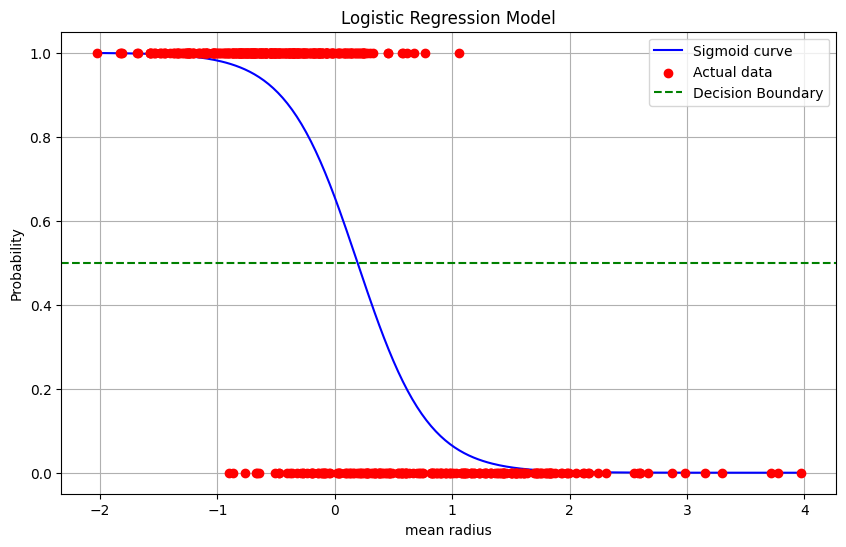

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals,y_probs , color = 'blue' ,  label='Sigmoid curve')
plt.scatter(x_single_scaled, y, color='red', zorder=2, label='Actual data')
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision Boundary')
plt.legend()
plt.xlabel(feature)
plt.ylabel('Probability')
plt.title('Logistic Regression Model')
plt.grid(True)
plt.show()

In [ ]:
scaler = StandardScaler()
df[data.feature_names] = scaler.fit_transform(df[data.feature_names])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [ ]:
x = df[data.feature_names]
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

result_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_df.head()

,Actual,Predicted
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1


In [ ]:
accuracy = accuracy_score(y_test,y_pred)
config_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{config_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9736842105263158
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



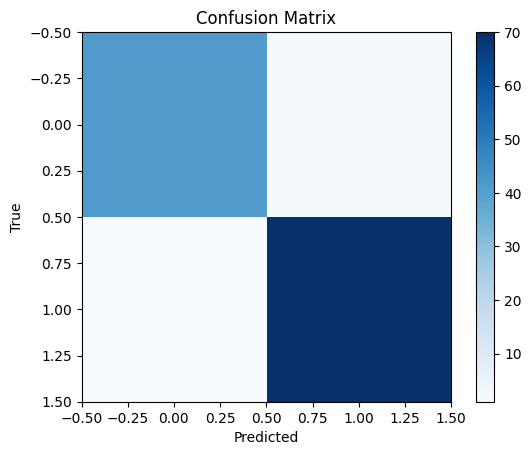

In [ ]:
plt.imshow(config_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()